# Diabetes



### Import ML packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
import seaborn as sns

%matplotlib inline

### Load and Read Dataset

In [3]:

df = pd.read_csv("diabetes.csv")

In [4]:
df.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
#Shape of the Dataset
df.shape

(768, 9)

## Data pre-processing

In [7]:
#df.drop(['id'],axis=1,inplace = True)

In [8]:
# Columns in the dataset
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Handling missing values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
#Diagnosis class Malignant = 4 and Benign = 2
#The number of Benign and Maglinant cases from the dataset
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [13]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df.fillna(method='ffill', inplace=True)

In [15]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Exploratory Data Analysis

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Bivariate Data Analysis

C:\Users\Sage0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


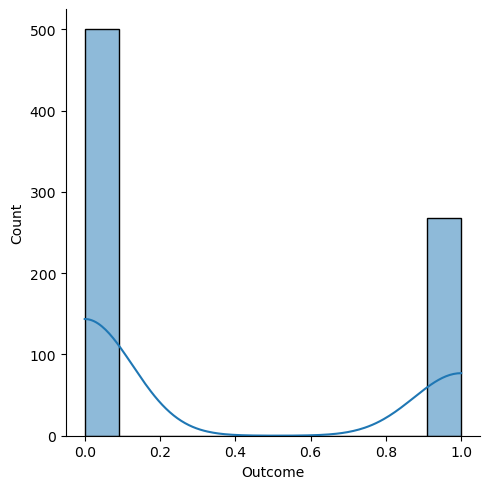

In [20]:
sns.displot(df['Outcome'],kde=True)

## Multivariate Data Analysis

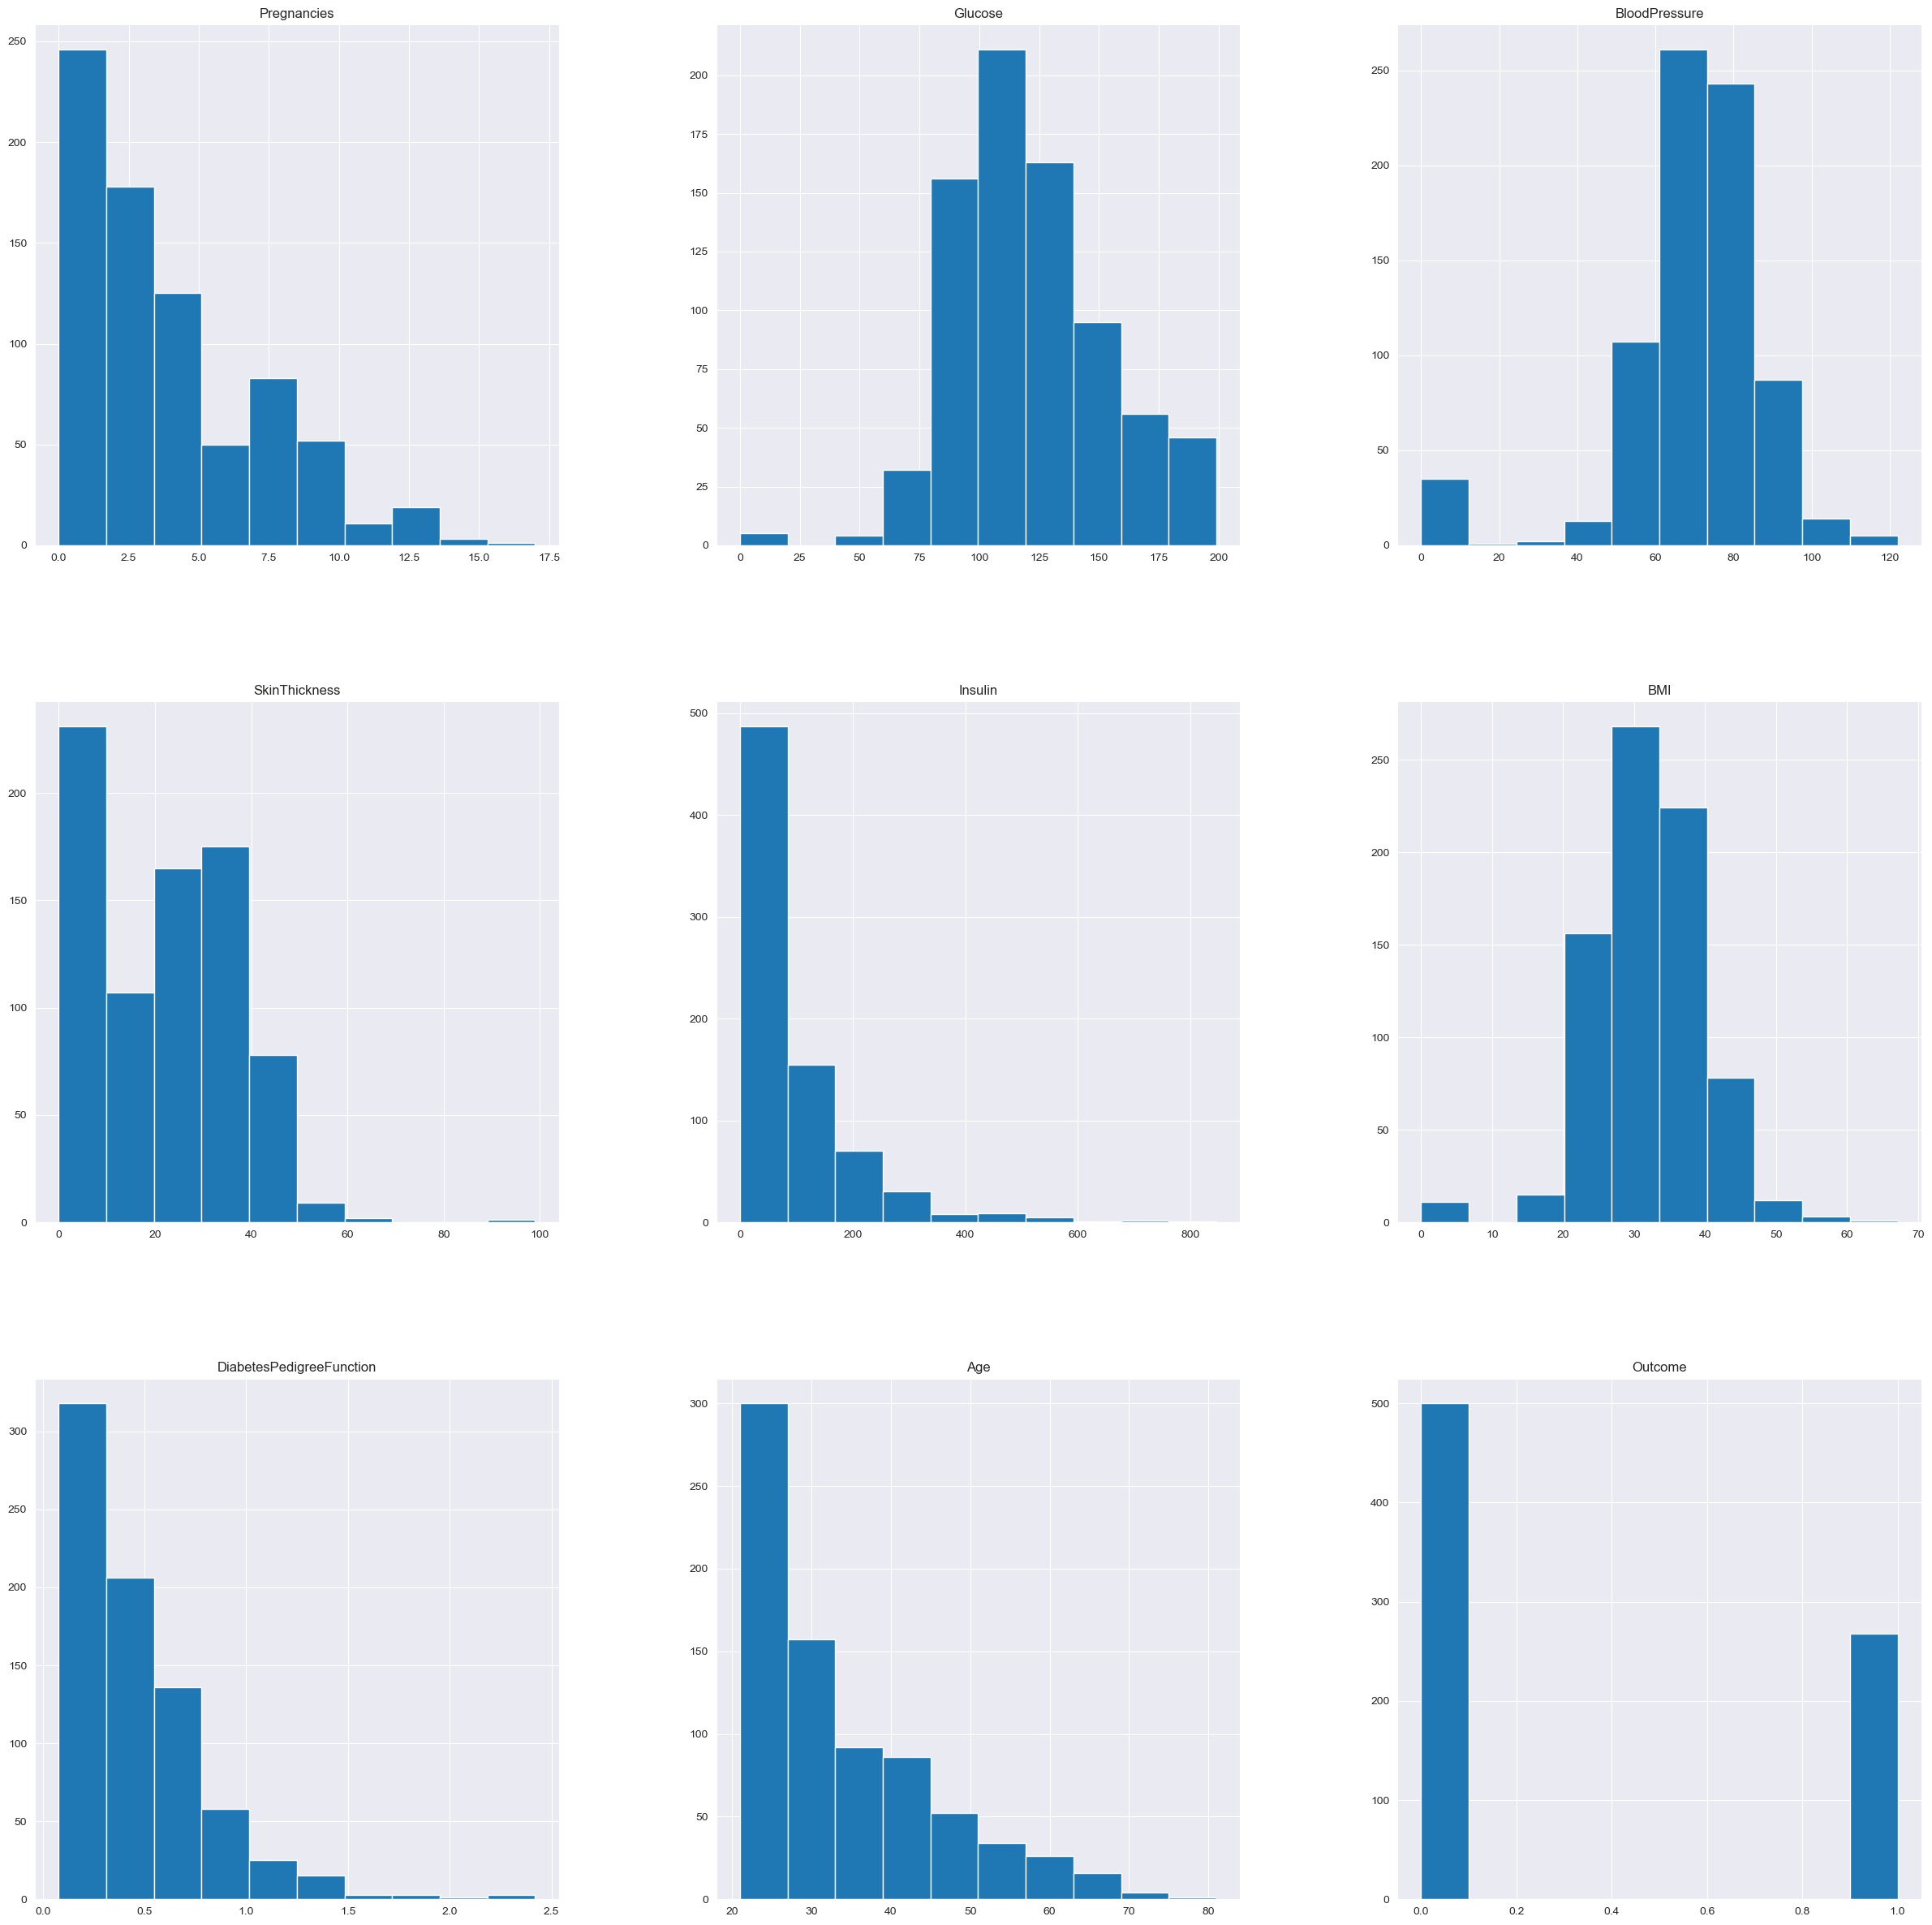

In [22]:
# Plot histograms for each variable
sns.set_style('darkgrid')
df.hist(figsize=(30,30))
plt.show()

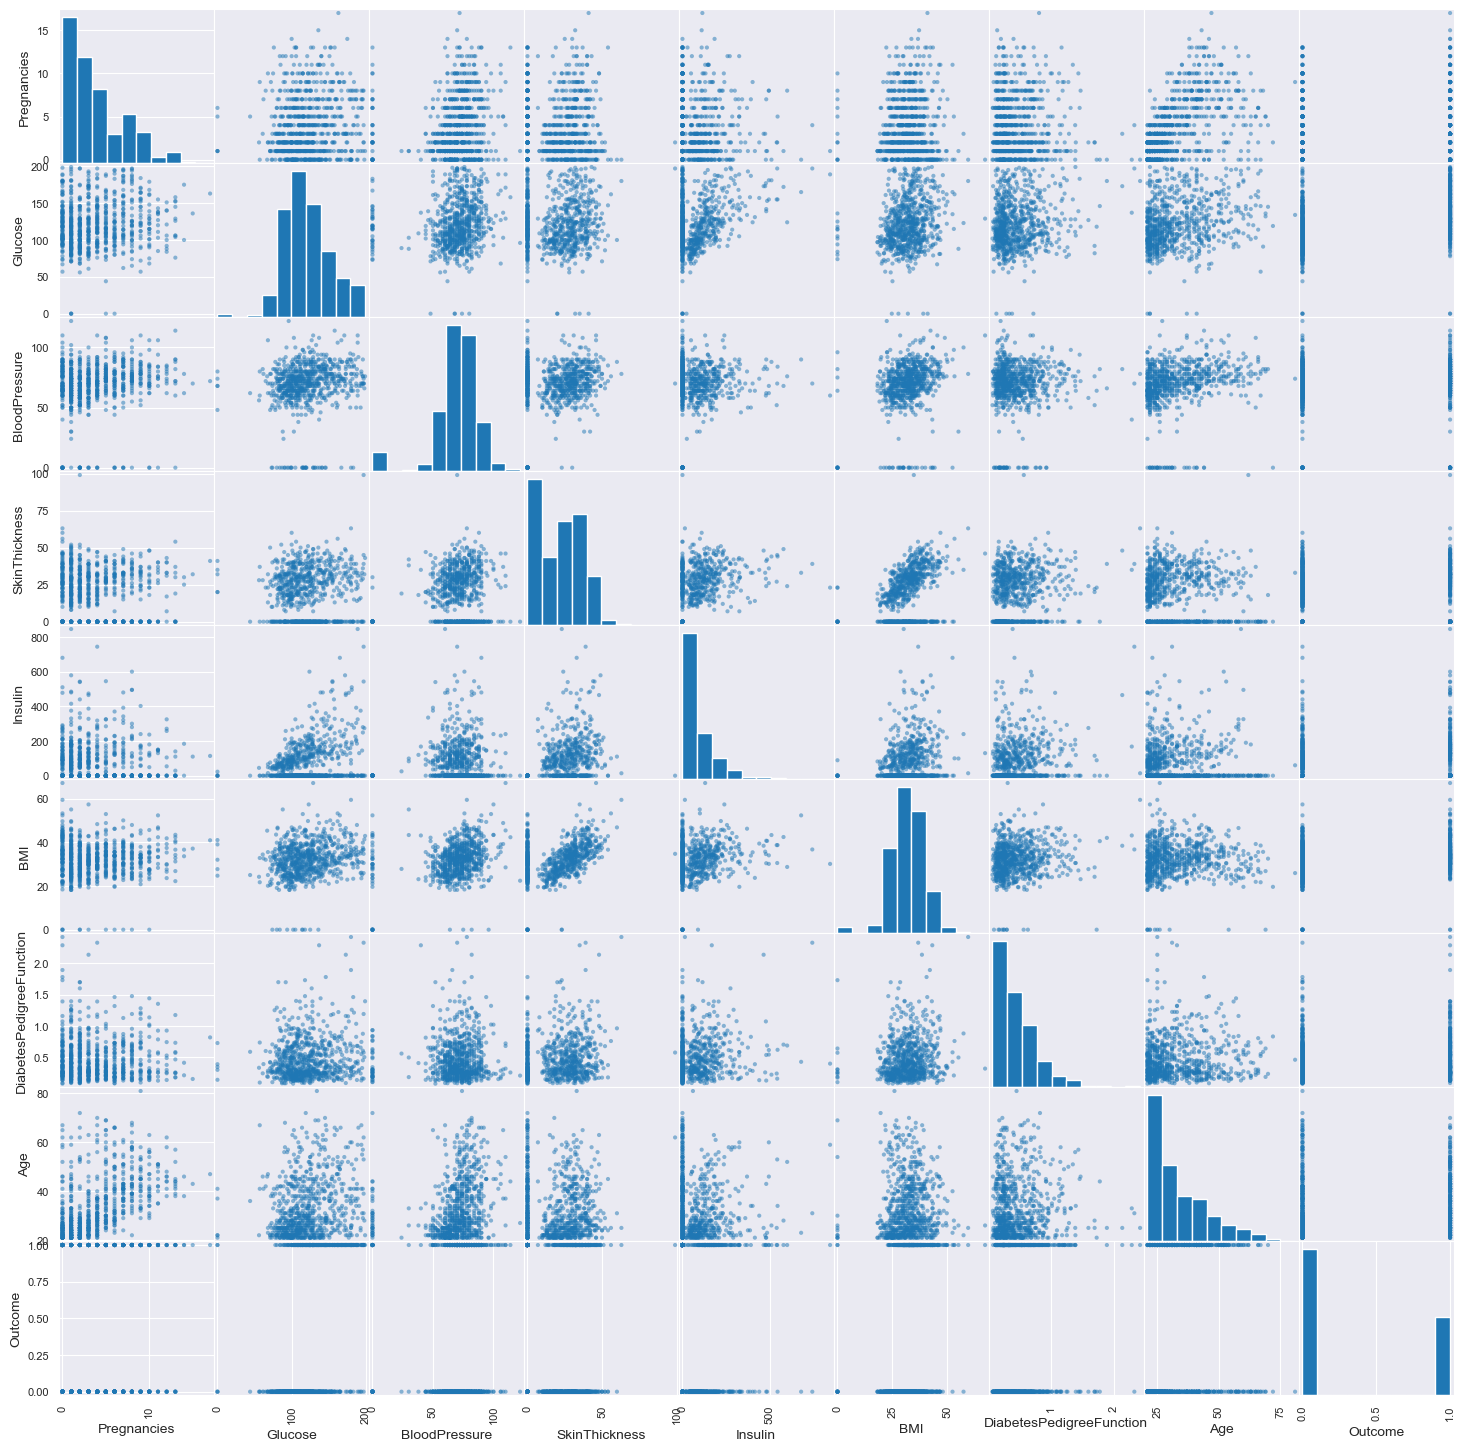

In [23]:
# Create scatter plot matrix
scatter_matrix(df, figsize = (18,18))
plt.show()

<Axes: >

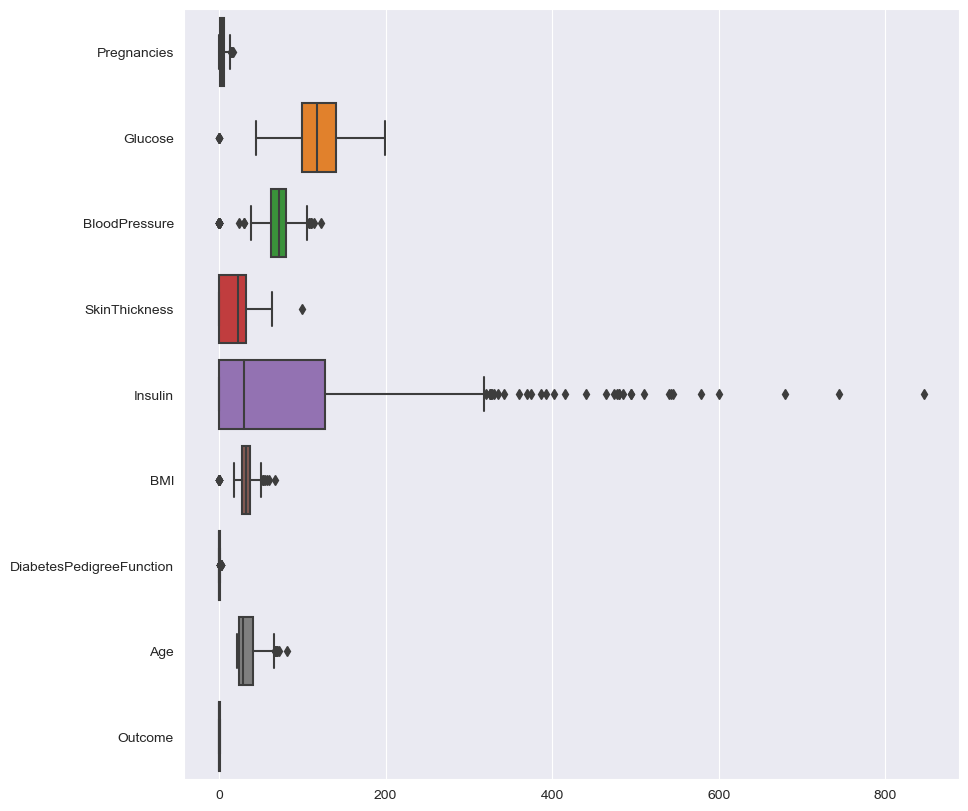

In [24]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,orient='h')

## Feature selection

In [25]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


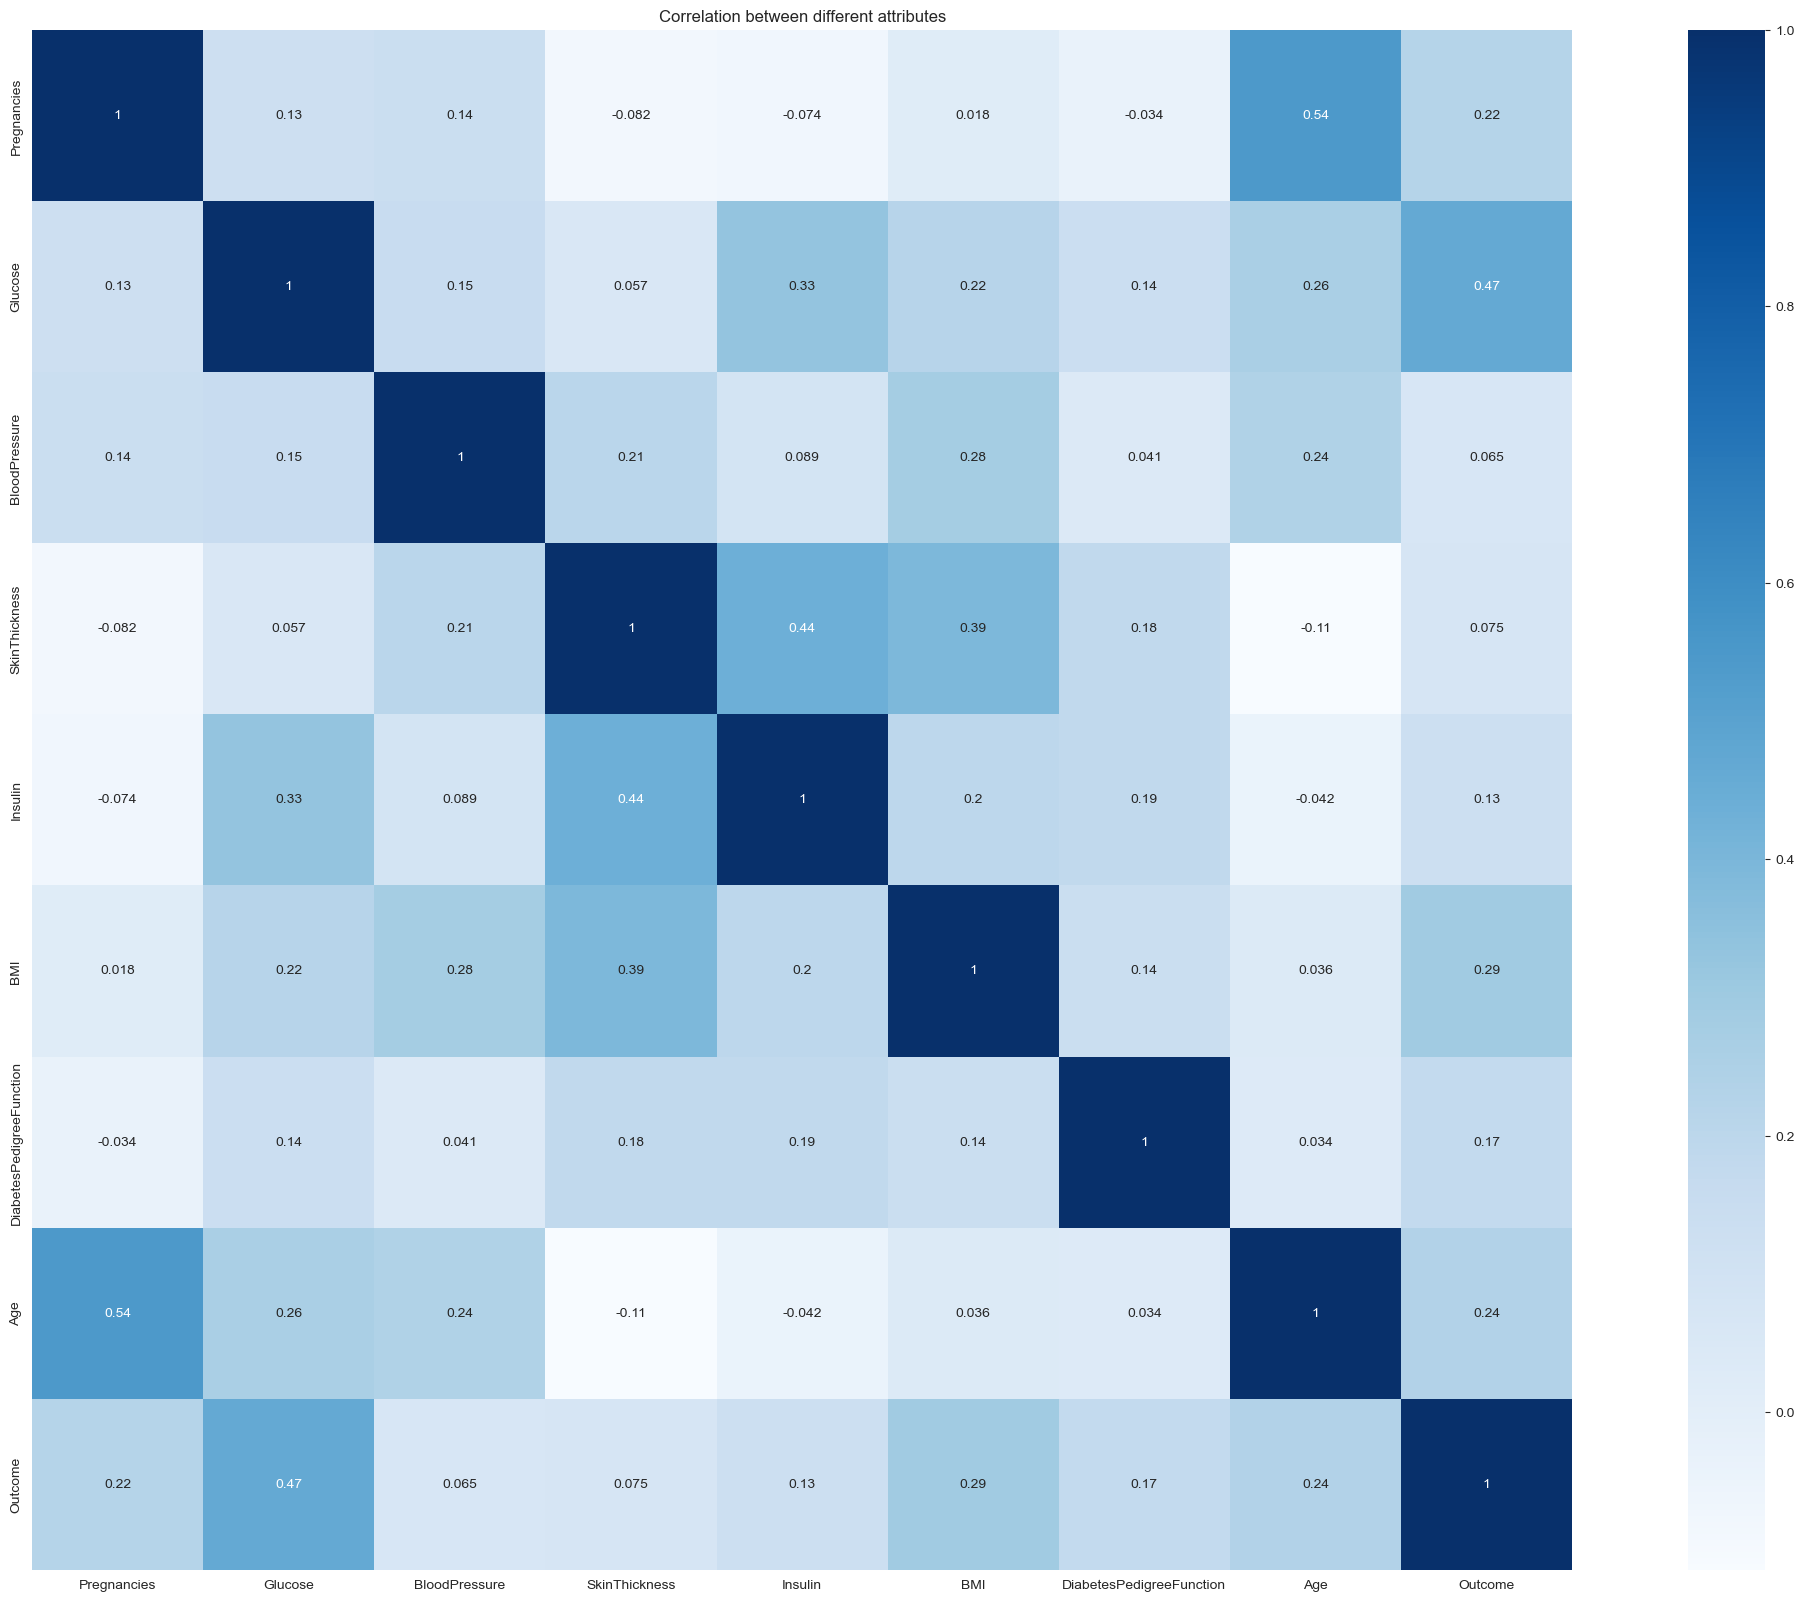

In [26]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

C:\Users\Sage0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


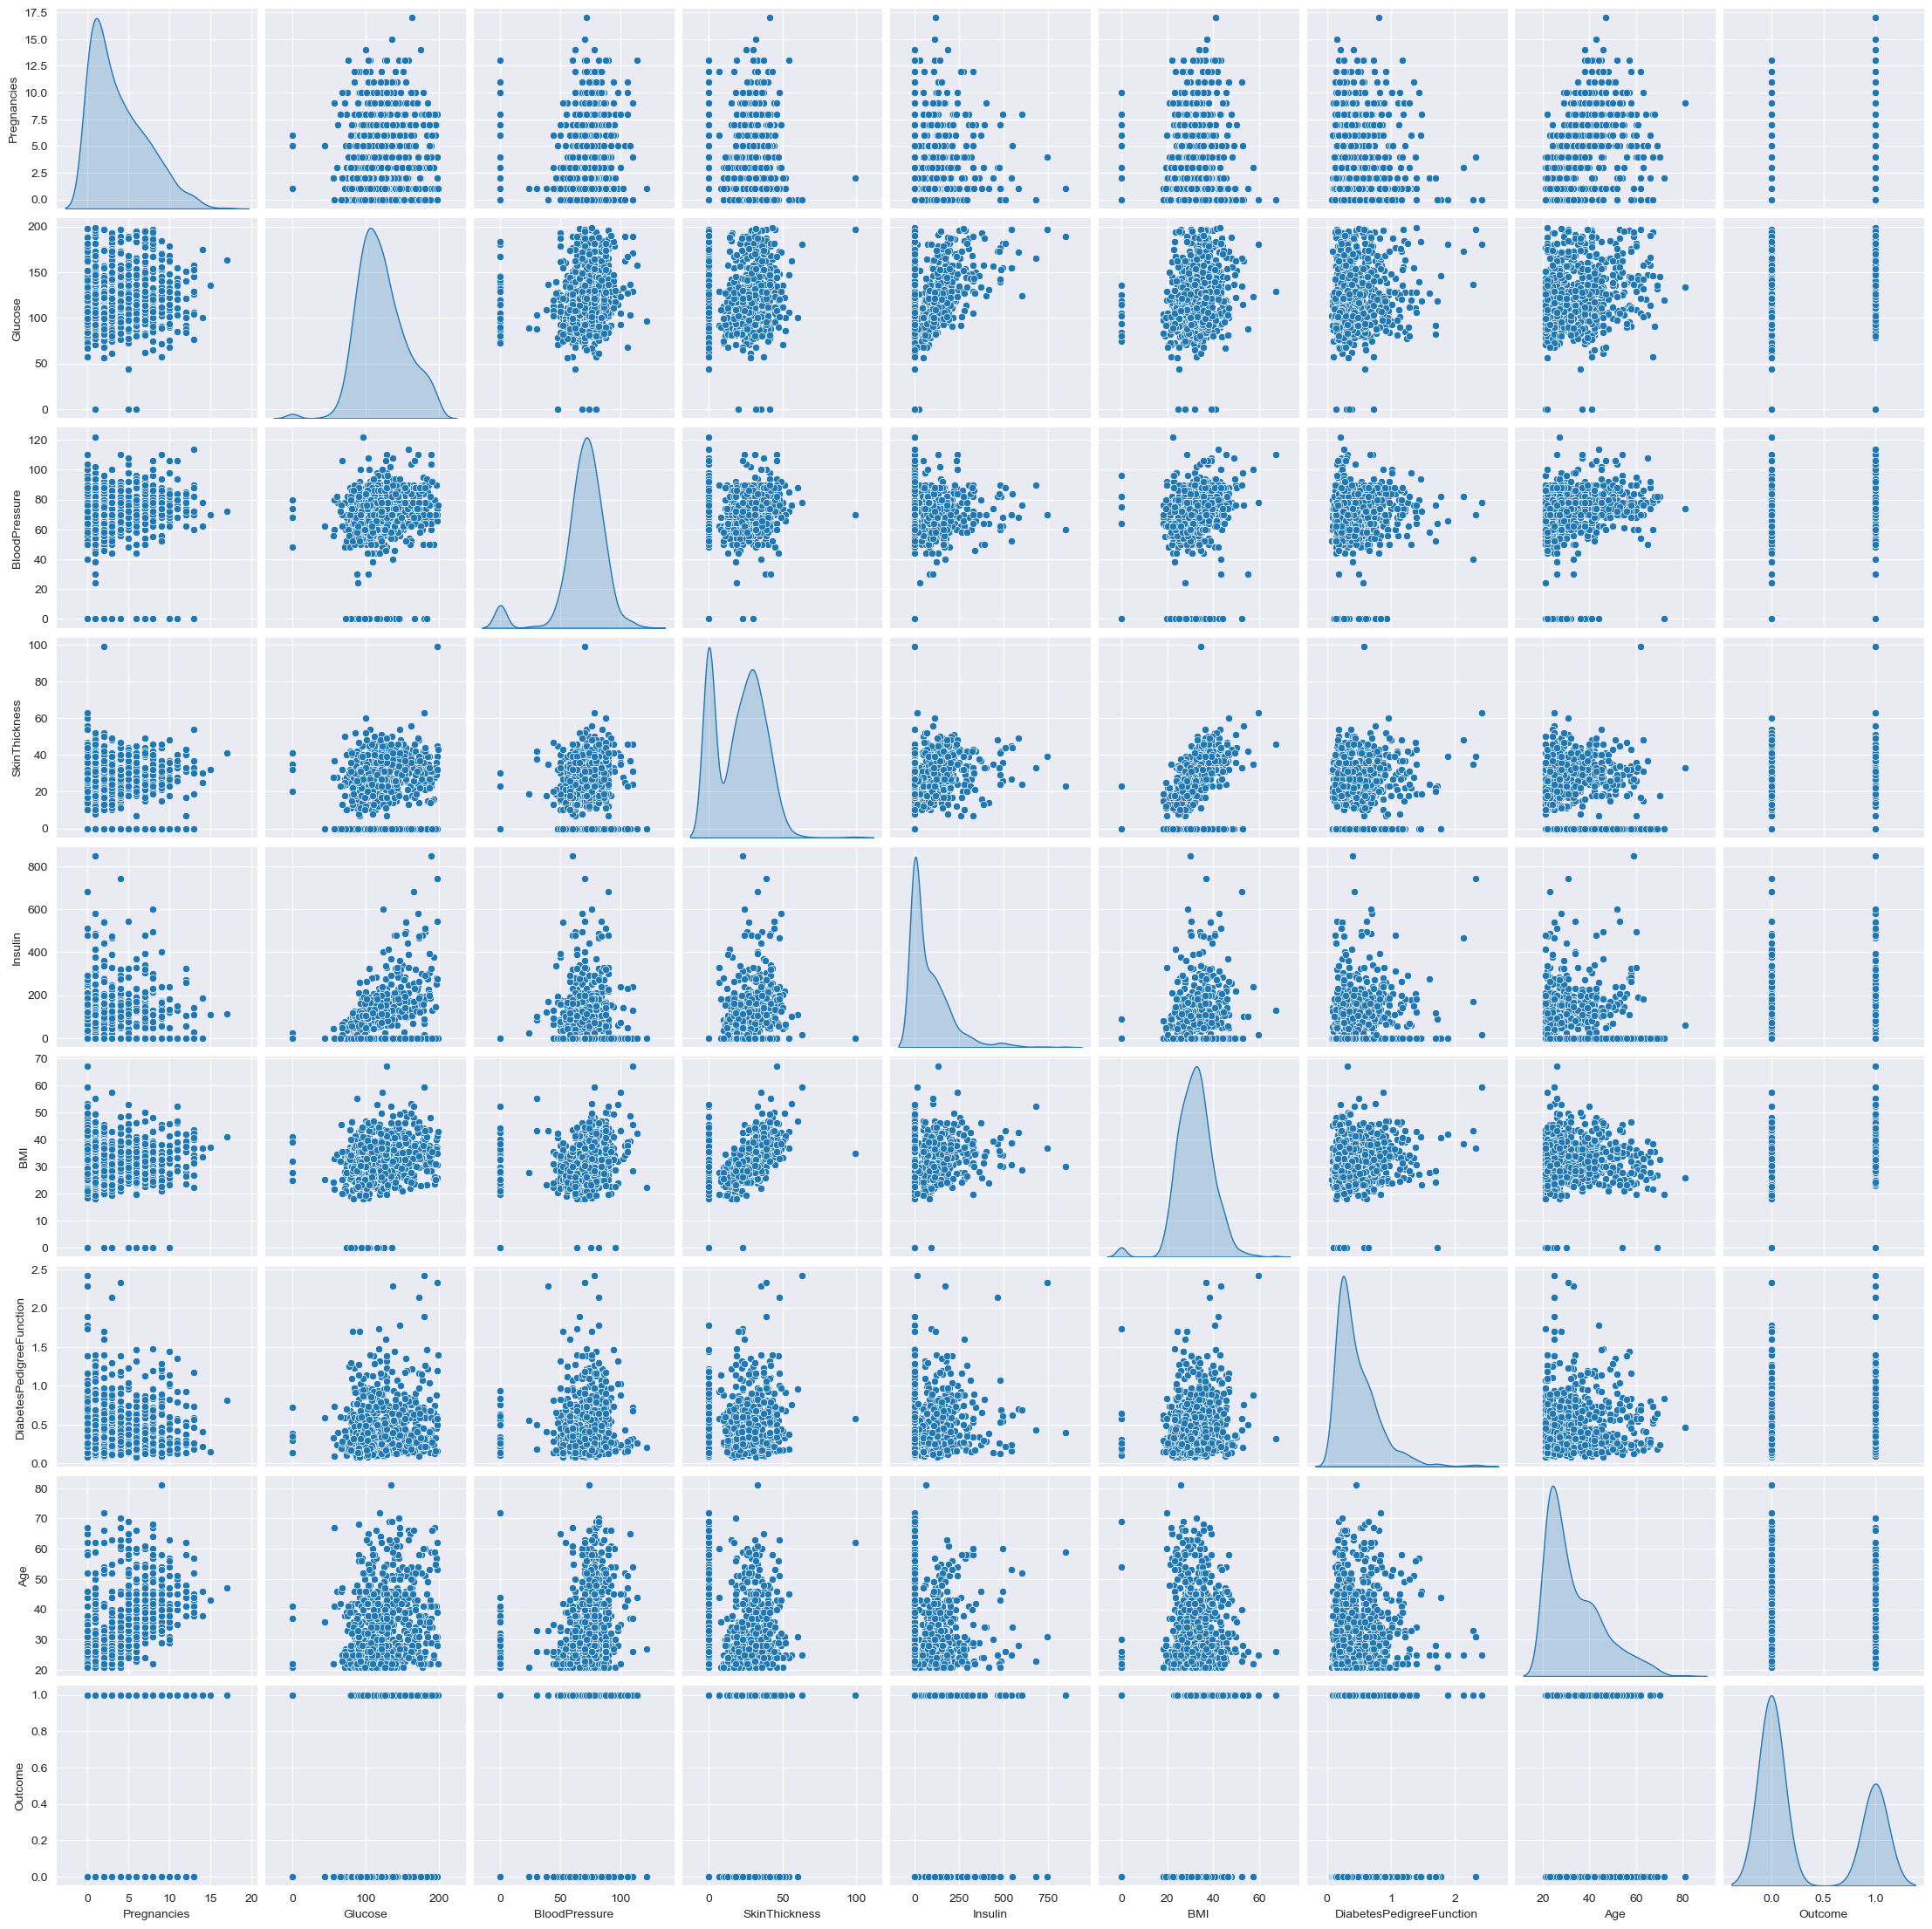

In [27]:
sns.pairplot(df,diag_kind='kde')

In [28]:
#Correlation with output variable
cor_target = abs(cor["Outcome"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

## Train and Test Model

In [29]:
#Split the data into predictor variables and target variable, following by breaking them into train and test sets. 
#df = df.drop('id', axis=1, inplace=True)

Y = df['Outcome'].values
X = df.drop('Outcome', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)

## Model Selection
### Baseline algorithm checking

* Analyse and build a model to predict if a given set of symptoms lead to breast cancer. This is a binary classification problem, and a few algorithms are appropriate for use. 

* As we do not know which one will perform the best at the point, we will do a quick test on the few appropriate algorithms with default setting to get an early indication of how each of them perform. 

* We will use 10 fold cross validation for each testing.

* The following non-linear algorithms will be used, namely: 
  * Classification and Regression Trees (CART) 
  * Linear Support Vector Machines (SVM)
  * Gaussian Naive Bayes (NB) 
  * k-Nearest Neighbors (KNN).

In [30]:
# Testing Options
scoring = 'accuracy'

In [31]:
# Define models to train
models= []
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC())) 
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model:Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

For CART Model:Mean accuracy is 0.717296 (Std accuracy is 0.061799)
For SVM Model:Mean accuracy is 0.789658 (Std accuracy is 0.049231)
For NB Model:Mean accuracy is 0.761530 (Std accuracy is 0.047692)
For KNN Model:Mean accuracy is 0.737352 (Std accuracy is 0.052512)


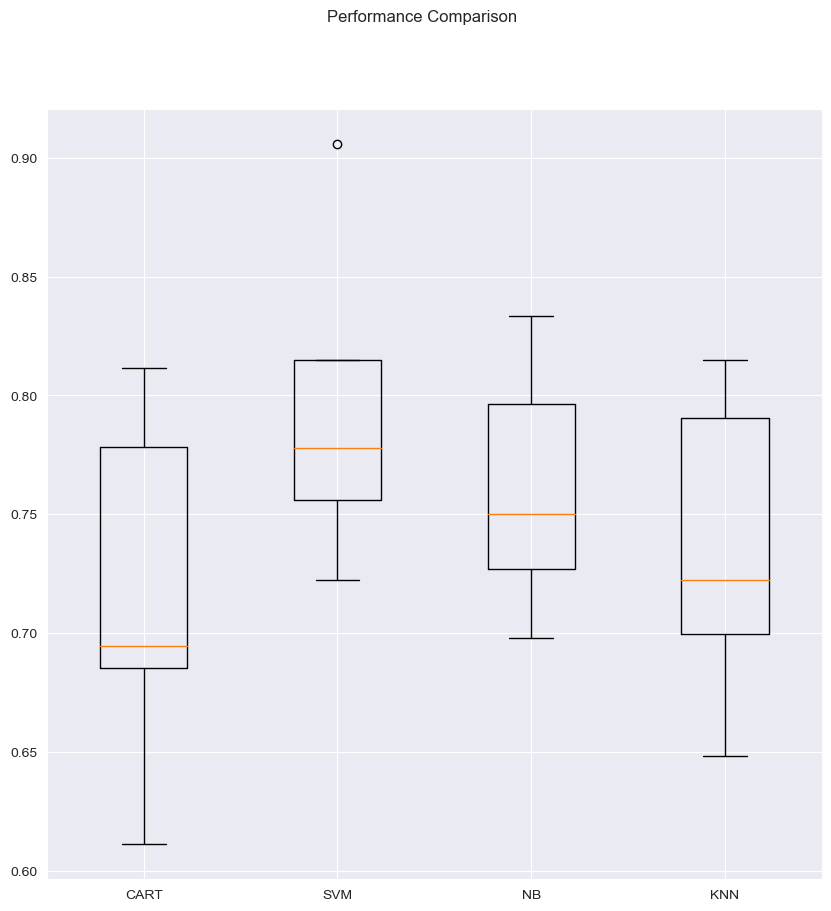

In [32]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

CART, SVM, GaussianNB and KNN  performed the best with  above 95% mean accuracy

In [33]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print("\nModel:",name)
    print("Accuracy score:",accuracy_score(Y_test, predictions))
    print("Classification report:\n",classification_report(Y_test, predictions))
    
# Accuracy - ratio of correctly predicted observation to the total observations. 
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false 


Model: CART
Accuracy score: 0.7056277056277056
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       144
           1       0.62      0.56      0.59        87

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.70      0.71      0.70       231


Model: SVM
Accuracy score: 0.7012987012987013
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.93      0.80       144
           1       0.74      0.32      0.45        87

    accuracy                           0.70       231
   macro avg       0.72      0.63      0.62       231
weighted avg       0.71      0.70      0.66       231


Model: NB
Accuracy score: 0.7316017316017316
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       144
           1       0.69 

## Support Vector Machine

In [34]:
clf = SVC()

clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print("Test Accuracy:",accuracy)

predict = clf.predict(X_test)
predict

Test Accuracy: 0.7012987012987013


array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [36]:
example_measures = [[4,2,1,1,1,2,3,2]]
prediction = clf.predict(example_measures)
print(prediction)

[0]


In [41]:
import itertools
sns.set_theme(style="dark")
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [45]:
import pickle
pickle.dump(clf, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))
print(model.predict([[6,148,72,35,0,33.6,0.627,50]]))

[1]
